# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
!pip install xgboost

In [128]:
df = pd.read_csv('healthcare_dataset.csv')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [129]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [131]:
print(df.dtypes)

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [132]:
# Handle Categorical Variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Admission Type'] = le.fit_transform(df['Admission Type'])
df['Test Results'] = le.fit_transform(df['Test Results'])
df['Medical Condition'] = le.fit_transform(df['Medical Condition'])
df['Medication'] = le.fit_transform(df['Medication'])
df['Blod Type'] = le.fit_transform(df['Blood Type'])

In [133]:
# Drop unnecessary column
columns_to_drop = ['Name', 'Date of Admission', 'Discharge Date', 'Hospital', 'Doctor', 'Billing Amount','Insurance Provider', 'Admission Type', 'Room Number']
df = df.drop(columns=columns_to_drop, axis=1)
df

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results,Blod Type
0,81,0,O-,3,0,1,7
1,35,1,O+,1,2,2,6
2,61,1,B-,5,2,2,5
3,49,1,B-,1,4,0,5
4,51,1,O-,0,3,2,7
...,...,...,...,...,...,...,...
9995,83,1,A+,5,1,0,0
9996,47,0,AB+,0,1,2,2
9997,54,1,B-,0,1,2,5
9998,84,1,A+,0,4,2,0


In [134]:
df.describe()

,Age,Gender,Medical Condition,Medication,Test Results,Blod Type
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,51.452200,0.492500,2.487500,2.02080,0.981100,3.501100
std,19.588974,0.499969,1.701803,1.41858,0.819762,2.286071
min,18.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,0.000000,1.000000,1.00000,0.000000,2.000000
50%,52.000000,0.000000,2.000000,2.00000,1.000000,3.000000
75%,68.000000,1.000000,4.000000,3.00000,2.000000,5.000000
max,85.000000,1.000000,5.000000,4.00000,2.000000,7.000000


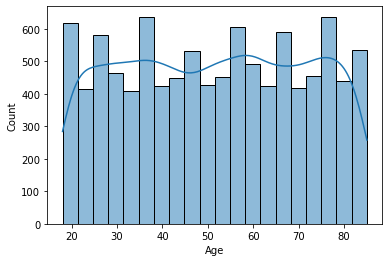

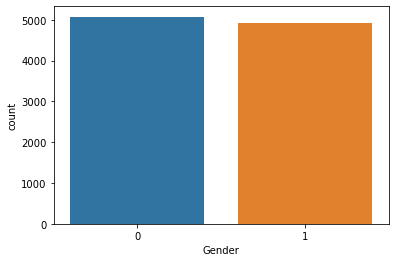

In [135]:
#EDA
# Distribution Plots
sns.histplot(df['Age'], bins=20, kde=True)
plt.show()

sns.countplot(x='Gender', data=df)
plt.show()

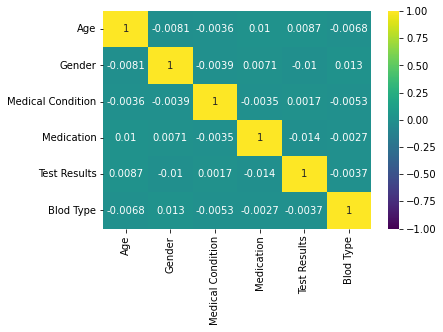

In [136]:
# Correlation Matrix Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.show()

In [137]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Extract features (X) and target variable (y)
X_reg = df.drop(['Medication'], axis=1)
y_reg = df['Medication']

# Encode categorical variable 'Medication' using LabelEncoder
label_encoder = LabelEncoder()
y_reg_encoded = label_encoder.fit_transform(y_reg)

# Split the data
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg_encoded, test_size=0.2, random_state=42)

# Perform one-hot encoding for categorical variables in X_reg
categorical_cols = ['Blood Type', 'Medical Condition']
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_reg_train_encoded = pd.get_dummies(X_reg_train, columns=categorical_cols)
X_reg_test_encoded = pd.get_dummies(X_reg_test, columns=categorical_cols)

# Fit linear regression model
reg_model = LinearRegression()
reg_model.fit(X_reg_train_encoded, y_reg_train)

# Make predictions
reg_preds = reg_model.predict(X_reg_test_encoded)

# Evaluate the model
reg_r2 = r2_score(y_reg_test, reg_preds)
print(f'Regression R-squared: {reg_r2}')
reg_mse = mean_squared_error(y_reg_test, reg_preds)
print(f'Regression Mean Squared Error: {reg_mse}')


Regression R-squared: -0.0007184728769333848
Regression Mean Squared Error: 2.018433148297208


In [138]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assume 'Age', 'Blood Type', 'Medical Condition', and 'Test Results' are relevant features
X_cls = df[['Age', 'Blood Type', 'Medical Condition', 'Test Results']]
y_cls = df['Medication']

# Encode categorical variable 'Medication' using LabelEncoder
label_encoder = LabelEncoder()
y_cls_encoded = label_encoder.fit_transform(y_cls)

# Split the data
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls_encoded, test_size=0.2, random_state=42)

# Perform one-hot encoding for categorical variables in X_cls
categorical_cols = ['Blood Type', 'Medical Condition']
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_cls_train_encoded = pd.get_dummies(X_cls_train, columns=categorical_cols)
X_cls_test_encoded = pd.get_dummies(X_cls_test, columns=categorical_cols)

# Create and train a Random Forest Classifier model
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_cls_train_encoded, y_cls_train)

# Make predictions
clf_preds = clf_model.predict(X_cls_test_encoded)

# Evaluate the performance of the classification model
accuracy = accuracy_score(y_cls_test, clf_preds)
print(f"Random Forest Classifier Accuracy: {accuracy}")


Random Forest Classifier Accuracy: 0.2015


In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train a k-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_class_train, y_class_train)
knn_preds = knn_model.predict(X_class_test)
knn_accuracy = accuracy_score(y_class_test, knn_preds)

print(f'KNN Accuracy: {knn_accuracy}')

KNN Accuracy: 0.3325


In [140]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Select relevant columns
df_apriori = df[['Age', 'Blood Type', 'Medical Condition', 'Medication', 'Test Results']]

# Convert 'Medication' to string and strip whitespace
df_apriori['Medication'] = df_apriori['Medication'].astype(str).str.strip()

# Convert to one-hot encoding
df_apriori_encoded = pd.get_dummies(df_apriori['Medication'])

# Run Apriori algorithm
frequent_itemsets = apriori(df_apriori_encoded, min_support=0.2, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules with confidence >= 0.6
rules_confidence_06 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("\nAssociation Rules with Confidence >= 0.6:")
print(rules_confidence_06)


Frequent Itemsets:
   support itemsets
0   0.2015      (2)
1   0.2079      (4)

Association Rules with Confidence >= 0.6:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3008\3633137275.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori['Medication'] = df_apriori['Medication'].astype(str).str.strip()
C:\Users\ASUS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Assume 'Test Results' is the target variable, and you have features in X_class
X_class = pd.get_dummies(df.drop(['Test Results'], axis=1)) 
y_class = df['Test Results']
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# XGBoost Classification
xgb_class_model = xgb.XGBClassifier()
xgb_class_model.fit(X_class_train, y_class_train)
xgb_class_preds = xgb_class_model.predict(X_class_test)
xgb_class_accuracy = accuracy_score(y_class_test, xgb_class_preds)
print(f'XGBoost Classification Accuracy: {xgb_class_accuracy}')


XGBoost Classification Accuracy: 0.3365


NameError: name 'xgb' is not defined